# User-Interface for Res-IRF
The Res-IRF model is a tool for simulating energy consumption for space heating in the French residential sector.

Its main characteristic is to integrate a detailed description of the energy performance of the dwelling stock with a rich description of household behaviour.

This notebook is an example of post-treatment.

In [3]:
import os
import pickle
import matplotlib.pyplot as plt

print(os.getcwd())
os.chdir(os.path.join(os.getcwd(), '..'))
print(os.getcwd())

from ui_utils import *
from parse_input import colors_dict

/Users/lucas/PycharmProjects/Res-IRF/project
/Users/lucas/PycharmProjects/Res-IRF


**User need to enter folder's name:**

In [4]:
# name_folder = '20210604_094019'
name_folder = os.path.join('20210706_145909')

In [5]:
folder_output = os.path.join(os.getcwd(), 'project', 'output', name_folder)
print('Output will be taken from: {}'.format(folder_output))

Output will be taken from: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210706_145909


# Summary

In [6]:
summary = pd.read_csv(os.path.join(folder_output, 'summary.csv'), index_col=[0])
display(summary)

,Stock,Consumption conventional (kWh),Consumption actual (kWh),Emission (gCO2),Use intensity renovation (%),Renovation rate renovation (%),Flow transition renovation,Capex renovation (€),Subsidies renovation (€),Cite (€),Cee subsidy (€),Eptz (€)
2018,2.501747e+07,2.675045e+11,1.947105e+11,3.795044e+13,0.791789,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2019,2.530305e+07,2.597725e+11,1.905213e+11,3.677378e+13,0.801175,0.030355,740836.955963,9.823893e+09,2.384873e+09,1.812352e+09,2.475053e+08,5.177160e+08
2020,2.595123e+07,2.529568e+11,1.870362e+11,3.573503e+13,0.814693,0.030675,743763.060597,9.729755e+09,2.375638e+09,1.839088e+09,2.508244e+08,5.276844e+08
2021,2.695166e+07,2.467083e+11,1.840620e+11,3.479496e+13,0.831585,0.031589,761147.128674,9.762258e+09,2.417919e+09,1.940042e+09,2.715114e+08,5.560478e+08


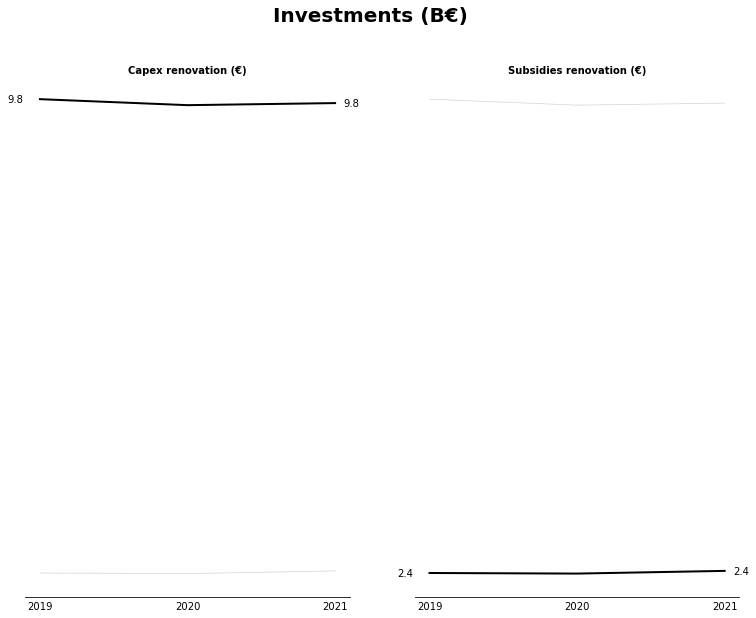

In [7]:
df = summary.loc[:, ['Capex renovation (€)', 'Subsidies renovation (€)']]
df.dropna(inplace=True)
economic_subplots(df.T, 'Investments (B€)', format_val=lambda x: '{:,.1f}'.format(x / 10**9), n_columns=2)

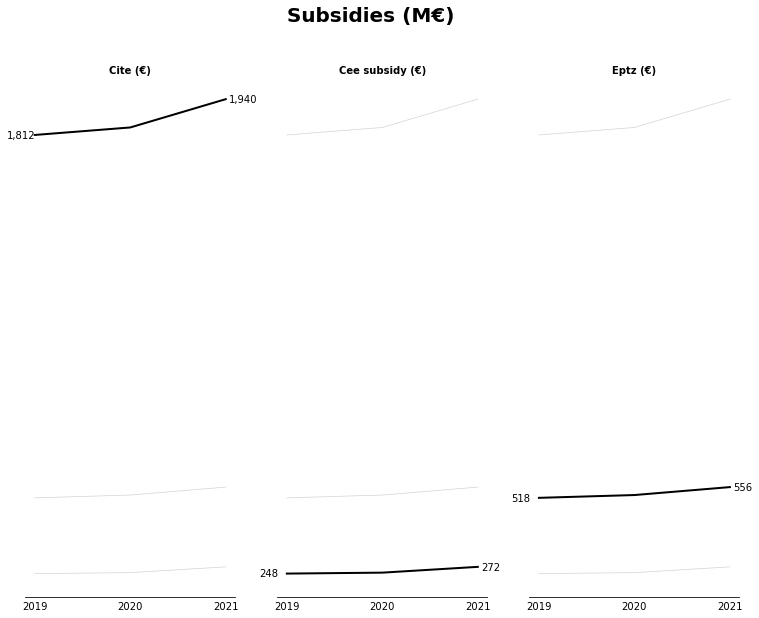

In [10]:
df = summary.loc[:, ['Cite (€)', 'Cee subsidy (€)', 'Eptz (€)']]
df.dropna(inplace=True)
economic_subplots(df.T, 'Subsidies (M€)', format_val=lambda x: '{:,.0f}'.format(x / 10**6), n_columns=3)

# Reading detailed input

3 kind of output:
- Buildings stock dynamic and attributes (consumption, heating intensity)
- Renovation
- Detailed subsidies

In [11]:
output_stock = pickle.load(open(os.path.join(folder_output, 'output_stock.pkl'), 'rb'))
output_transition = pickle.load(open(os.path.join(folder_output, 'output_transition.pkl'), 'rb'))
output_subsidies = pickle.load(open(os.path.join(folder_output, 'output_subsides.pkl'), 'rb'))
output_subsidies_year = pickle.load(open(os.path.join(folder_output, 'output_subsides_year.pkl'), 'rb'))

In [12]:
output_stock.keys()

dict_keys(['Stock - Renovation', 'Stock (m2) - Renovation', 'Consumption conventional (kWh/m2) - Renovation', 'Consumption conventional (kWh) - Renovation', 'Consumption actual (kWh/m2) - Renovation', 'Consumption actual (kWh) - Renovation', 'Budget share (%) - Renovation', 'Use intensity (%) - Renovation', 'Emission (gCO2/m2) - Renovation', 'Emission (gCO2) - Renovation', 'Taxes cost (€/m2) - Renovation', 'Taxes cost (€) - Renovation', 'Stock - Construction', 'Stock (m2) - Construction', 'Consumption conventional (kWh/m2) - Construction', 'Consumption conventional (kWh) - Construction', 'Consumption actual (kWh/m2) - Construction', 'Consumption actual (kWh) - Construction', 'Budget share (%) - Construction', 'Use intensity (%) - Construction', 'Emission (gCO2/m2) - Construction', 'Emission (gCO2) - Construction', 'Taxes cost (€/m2) - Construction', 'Taxes cost (€) - Construction', 'Stock', 'Stock (m2)', 'Consumption conventional (kWh/m2)', 'Consumption conventional (kWh)', 'Consumptio

# Initial dwelling stock

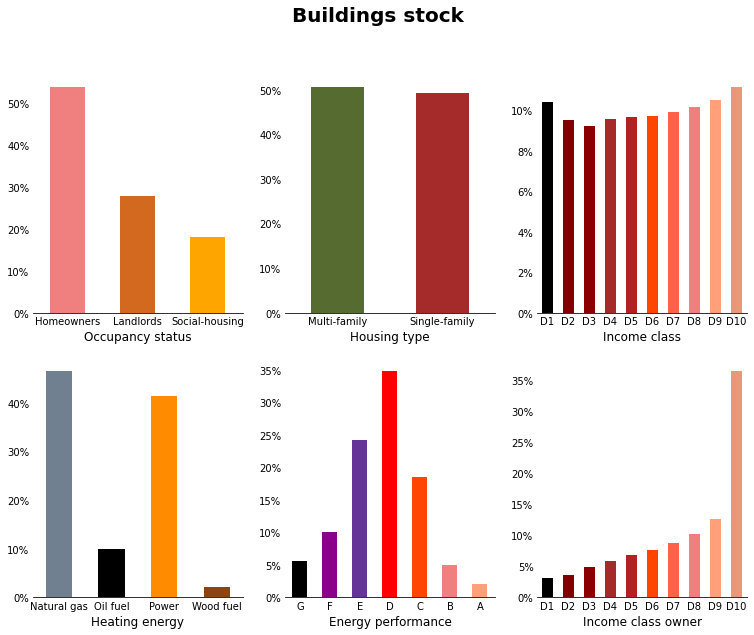

In [13]:
dict_order = {'Energy performance': ['G', 'F', 'E', 'D', 'C', 'B', 'A'], 'Income class': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'], 'Income class owner': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']}
stock_attributes_subplots(output_stock['Stock - Renovation'].loc[:, 2018], dict_order=dict_order, dict_color=colors_dict)

# Evolution of dwelling stock
Res-IRF considers stock dynamics. Buildings demolition, construction and renovation.

In [14]:
def grouped_and_graph(df, level, title, level_order=None, format_val=lambda x: '{:.1f}M'.format(x / 10**6), func='sum'):
    
    if func == 'sum':   
        df = df.groupby([level]).sum()
    elif func == 'mean':
        df = df.groupby([level]).mean()

        
    if level_order:
        df = df.loc[level_order]
    economic_subplots(df, '{} by {}'.format(title, level.lower()),
                      format_axtitle=lambda x: x, format_val=format_val)


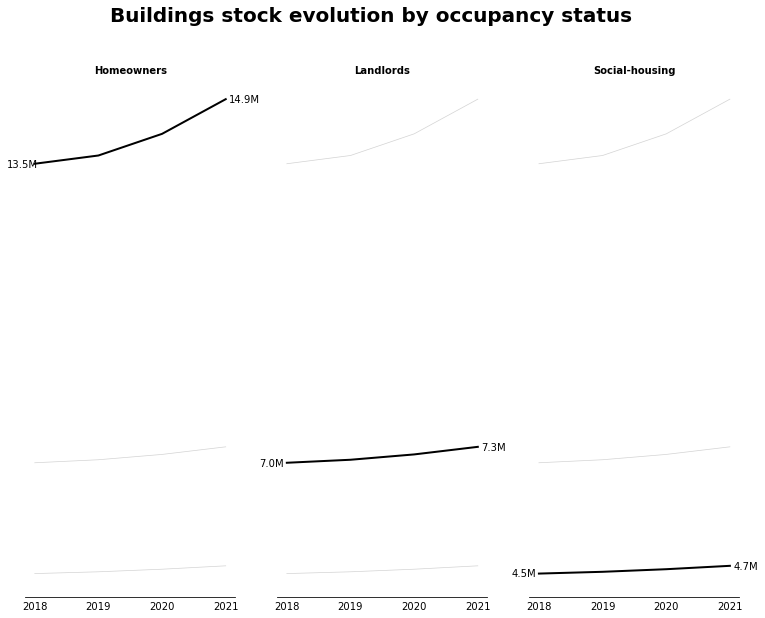

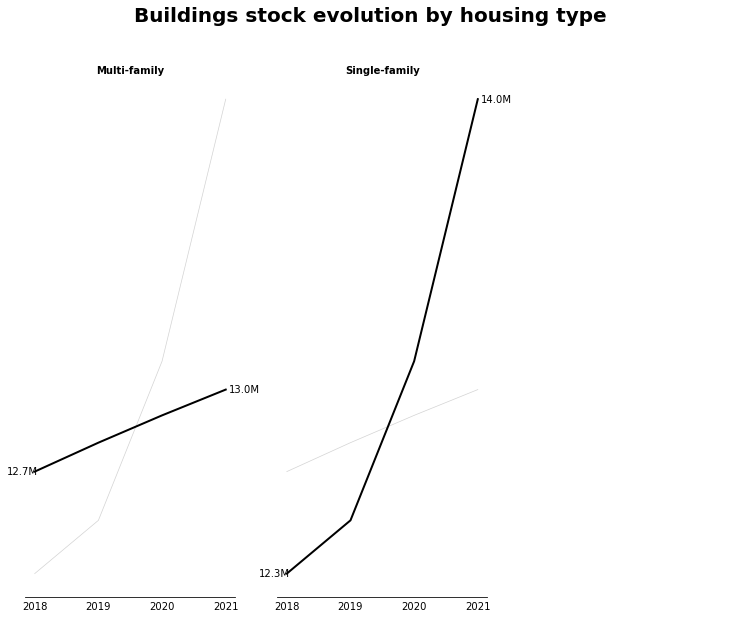

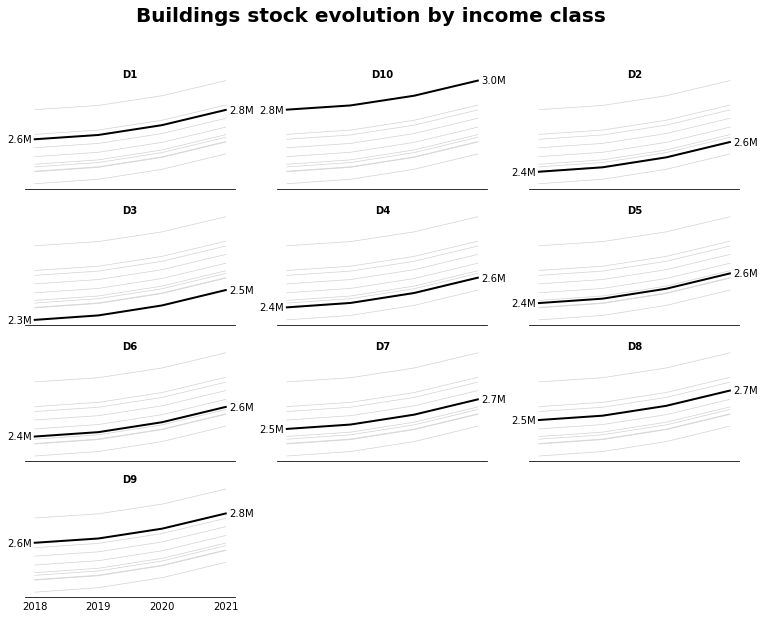

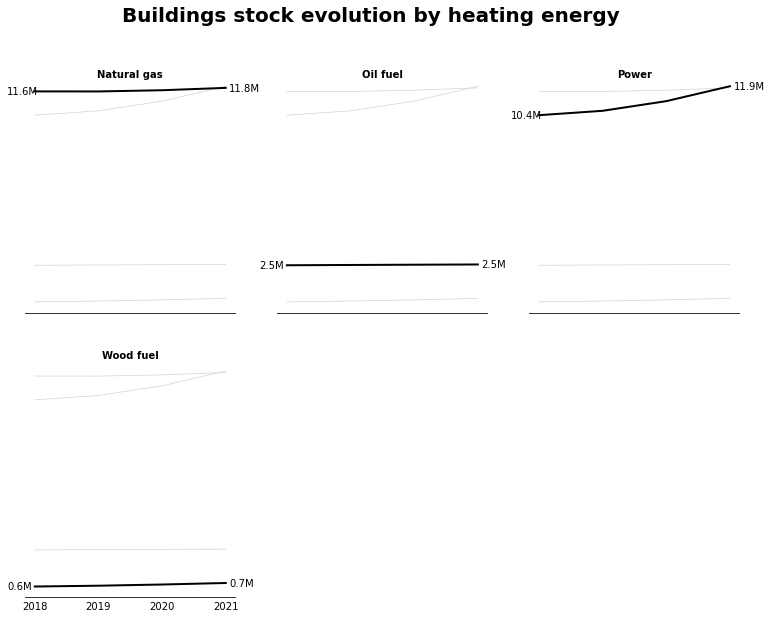

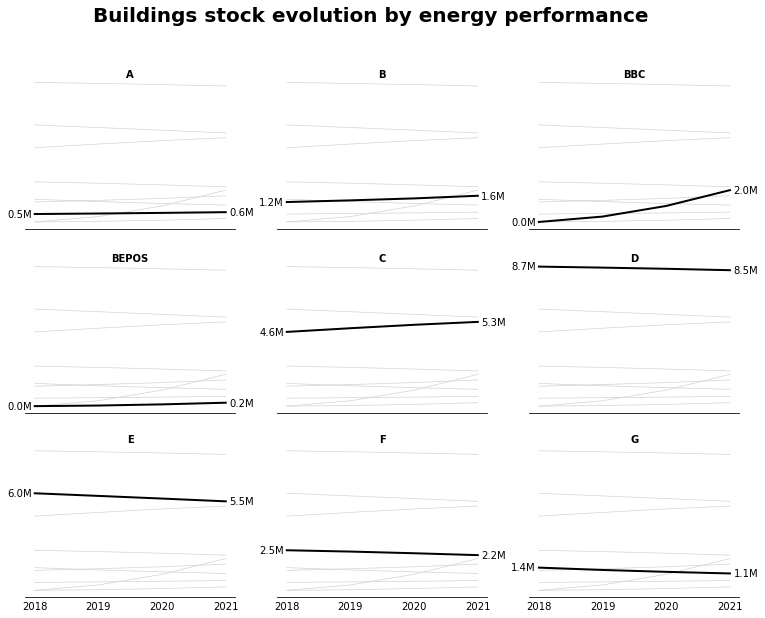

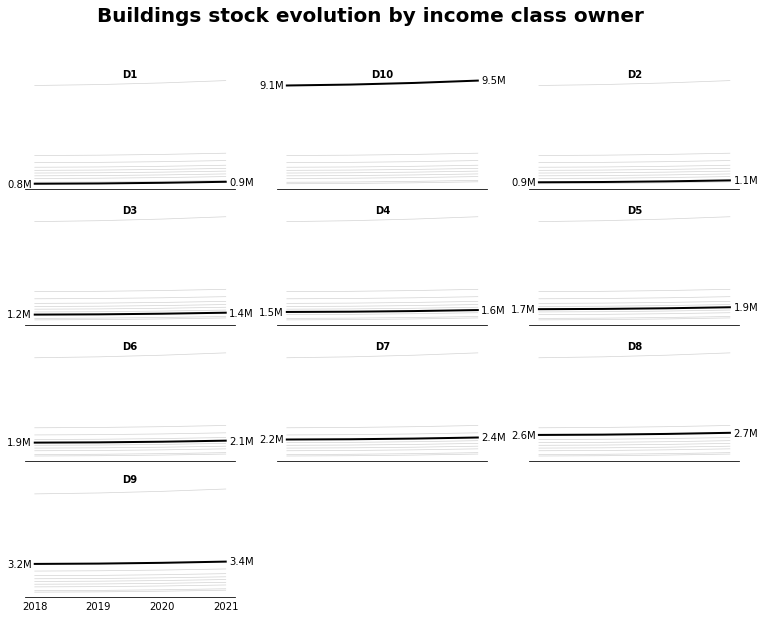

In [15]:
for level in output_stock['Stock'].index.names:
    grouped_and_graph(output_stock['Stock'], level, 'Buildings stock evolution')#, level_order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'BEPOS', 'BBC'])

In [14]:
for k in output_stock.keys():
    if isinstance(output_stock[k], pd.DataFrame):
        output_stock[k].dropna(axis=1, how='all', inplace=True)

# Energy consumption

Energy consumption is calculated in kWh in Res-IRF (/$10^9$ for TWh)

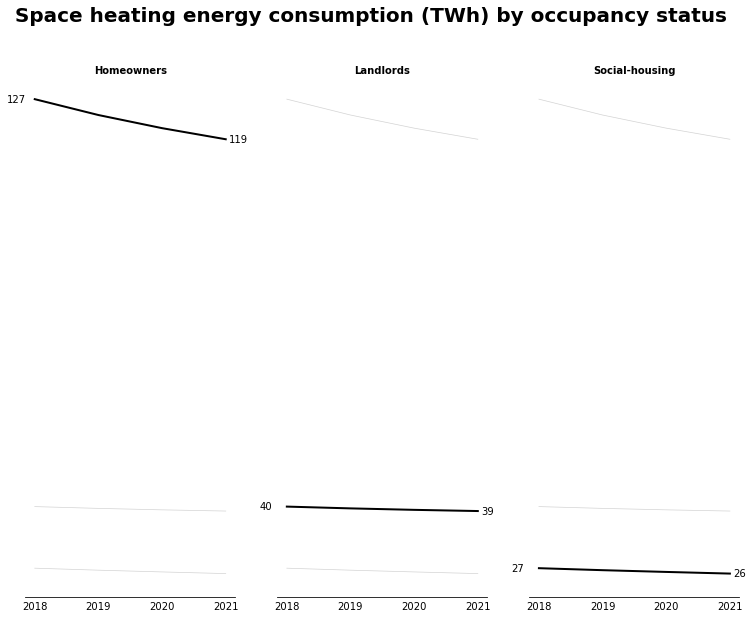

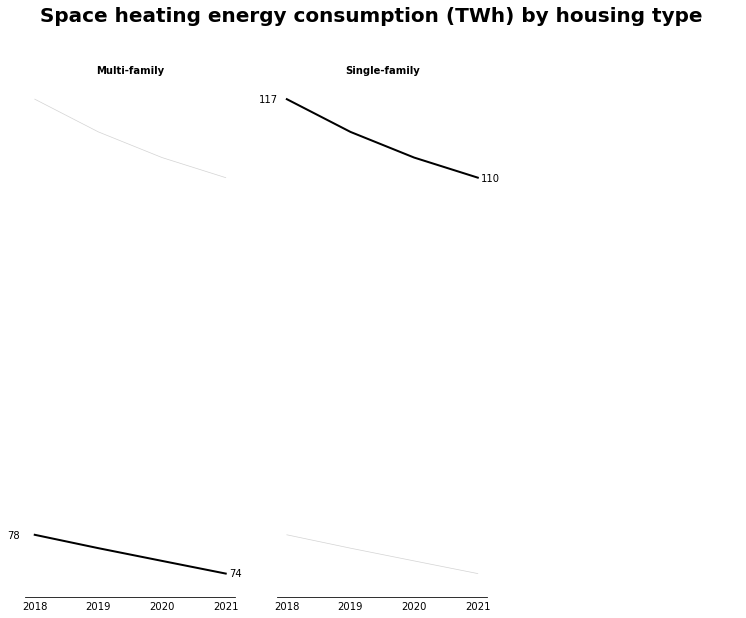

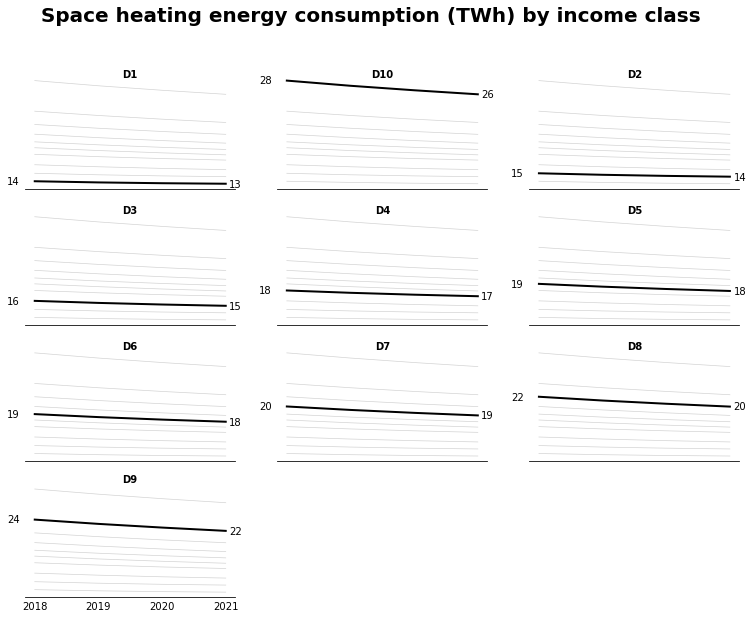

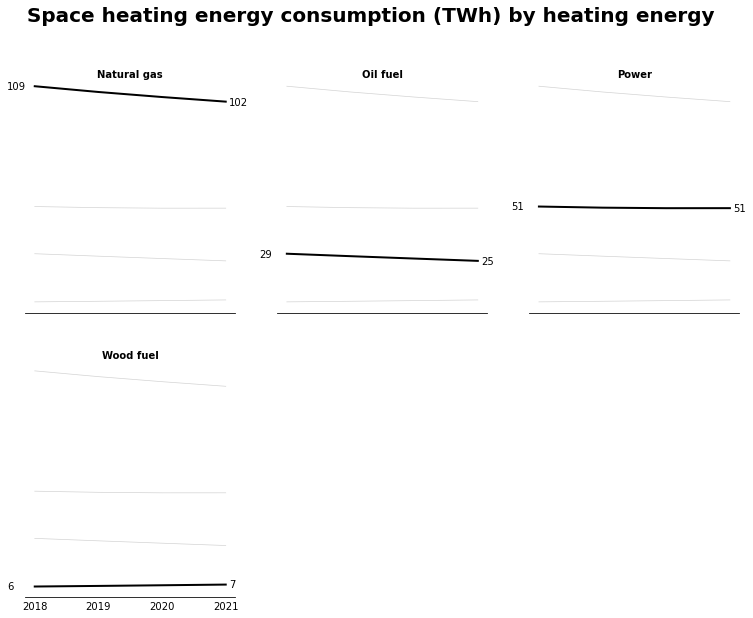

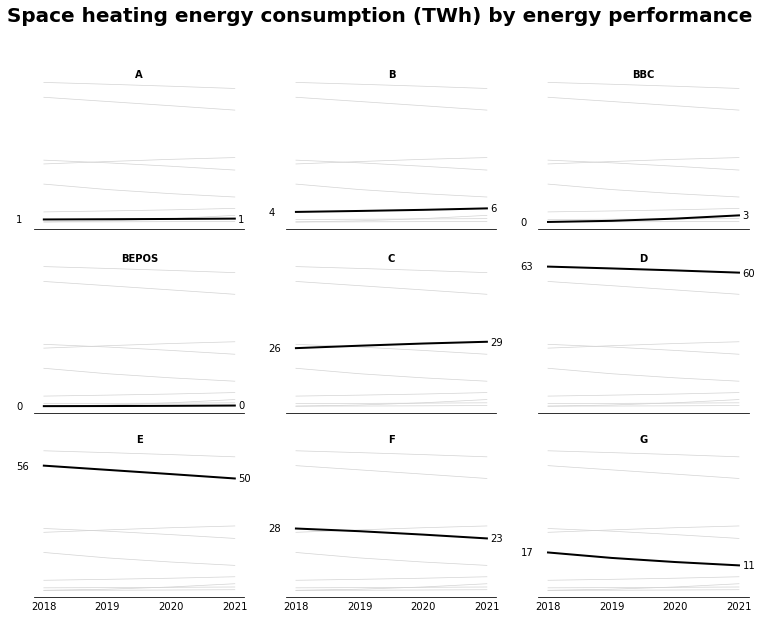

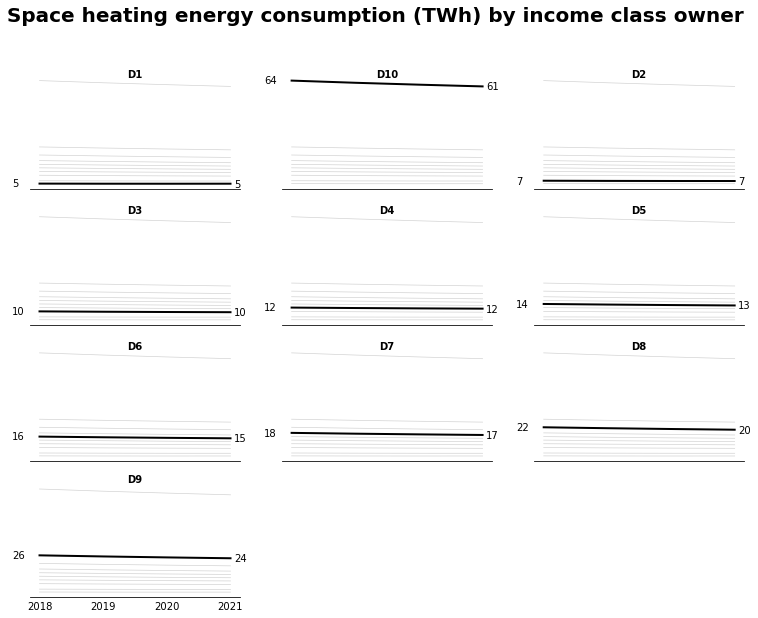

In [15]:
for level in output_stock['Consumption actual (kWh)'].index.names:
    grouped_and_graph(output_stock['Consumption actual (kWh)'], level, 'Space heating energy consumption (TWh)', format_val=lambda x: '{:.0f}'.format(x / 10**9))

# CO2 Emissions

CO2 emisisons is in gCO2 (/$10^{12}$ MtCO2)

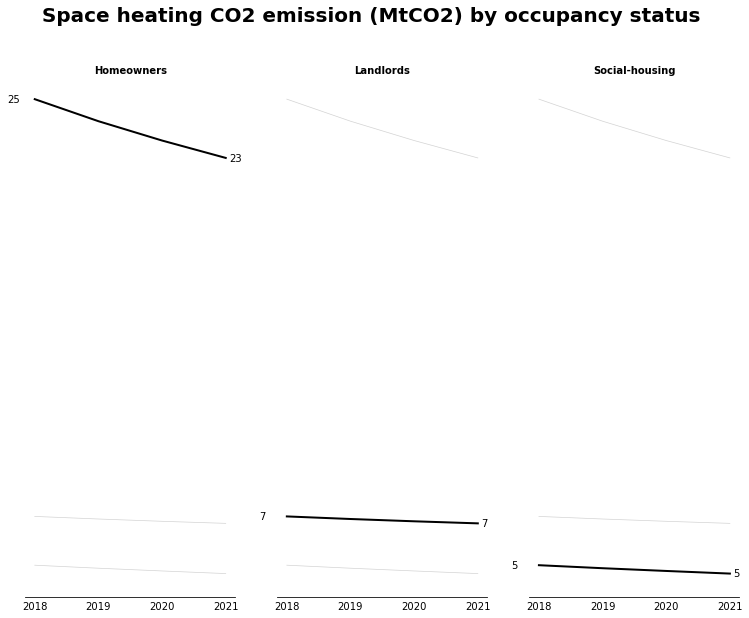

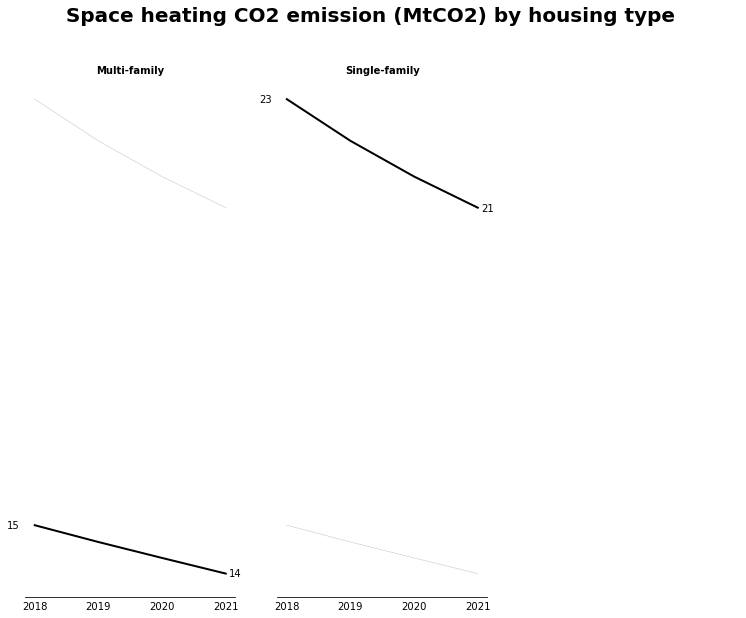

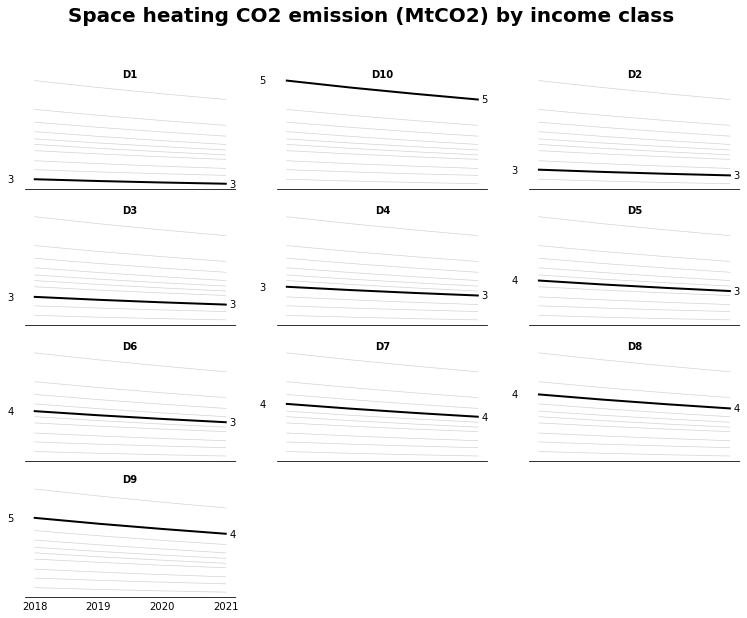

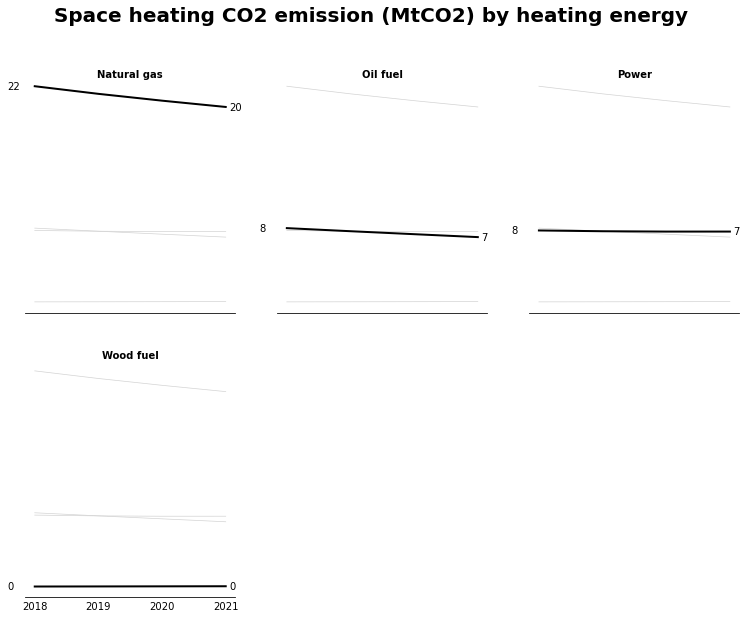

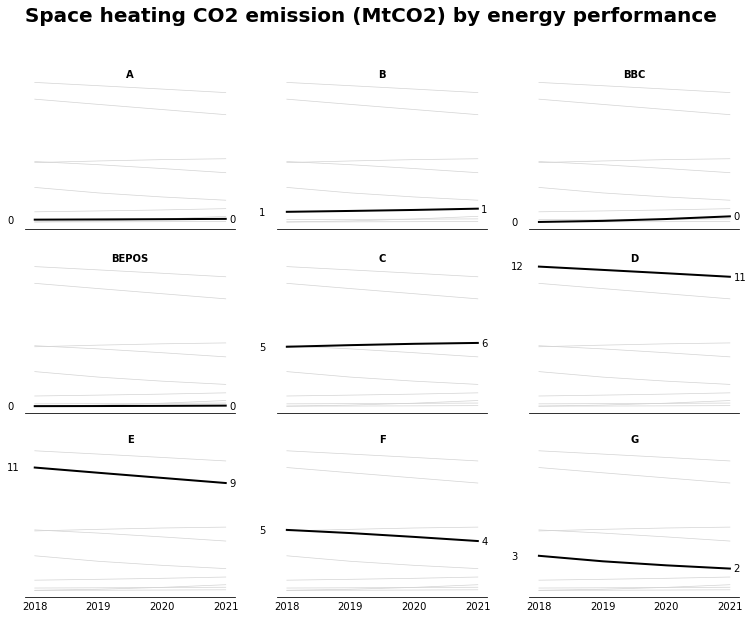

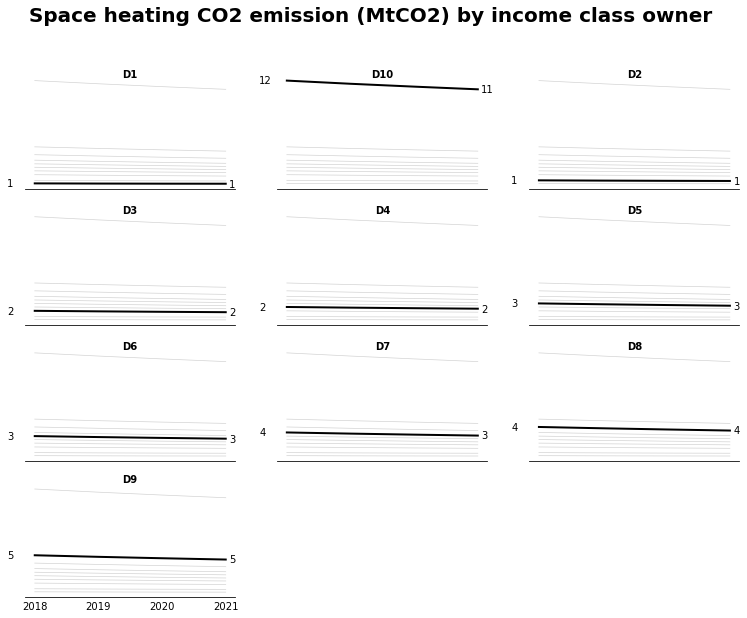

In [16]:
for level in output_stock['Emission (gCO2)'].index.names:
    grouped_and_graph(output_stock['Emission (gCO2)'], level, 'Space heating CO2 emission (MtCO2)', format_val=lambda x: '{:.0f}'.format(x / 10**12))

# Renovation rate

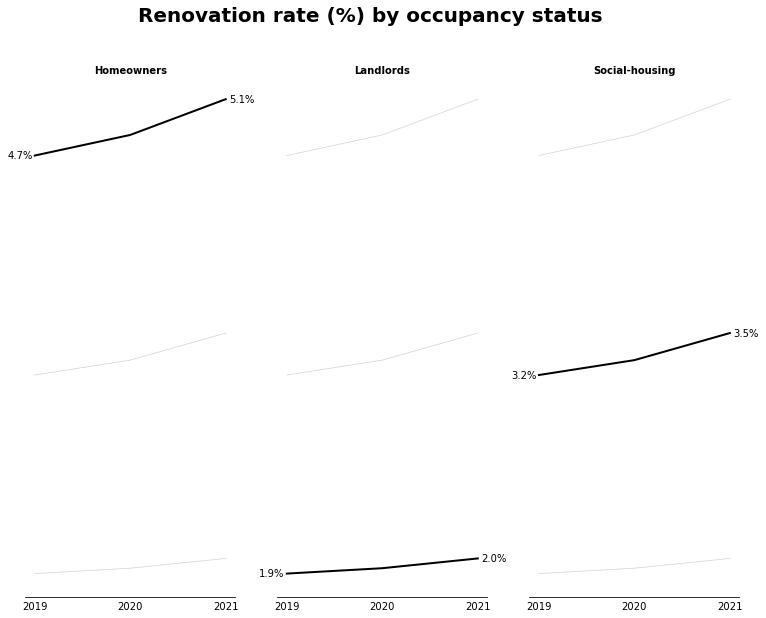

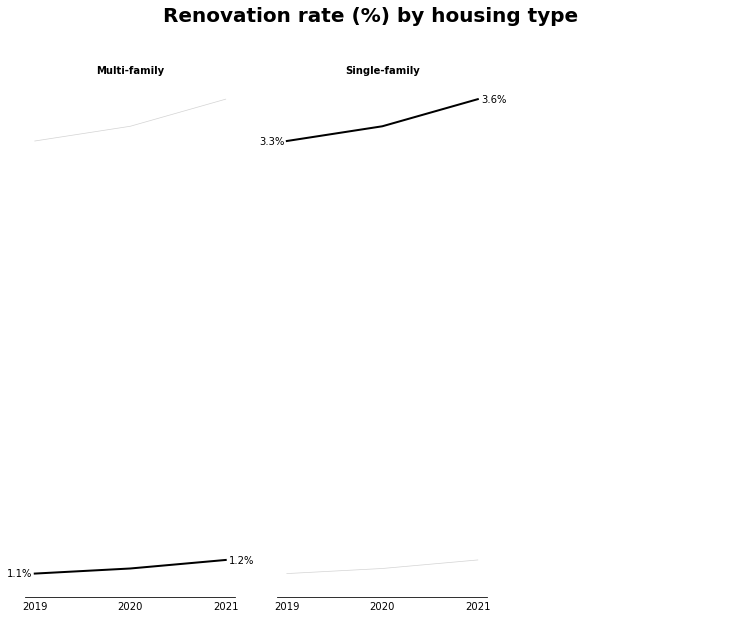

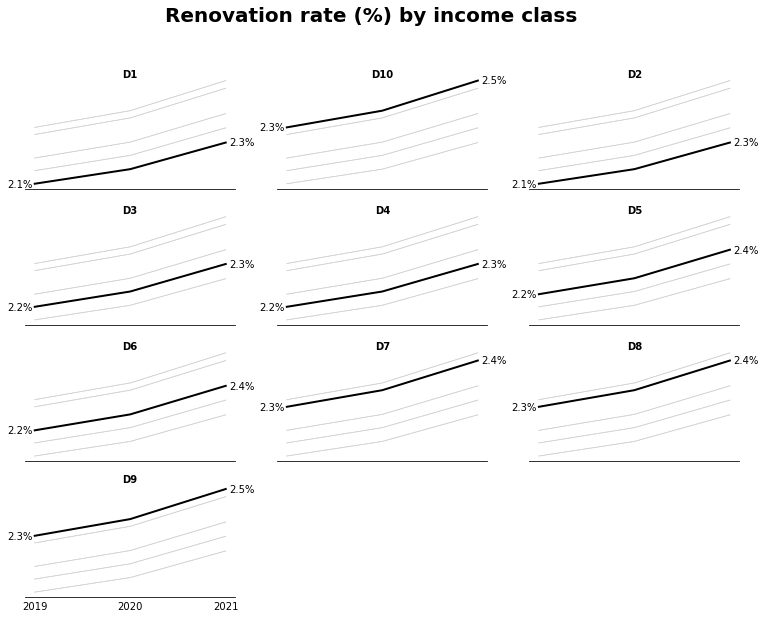

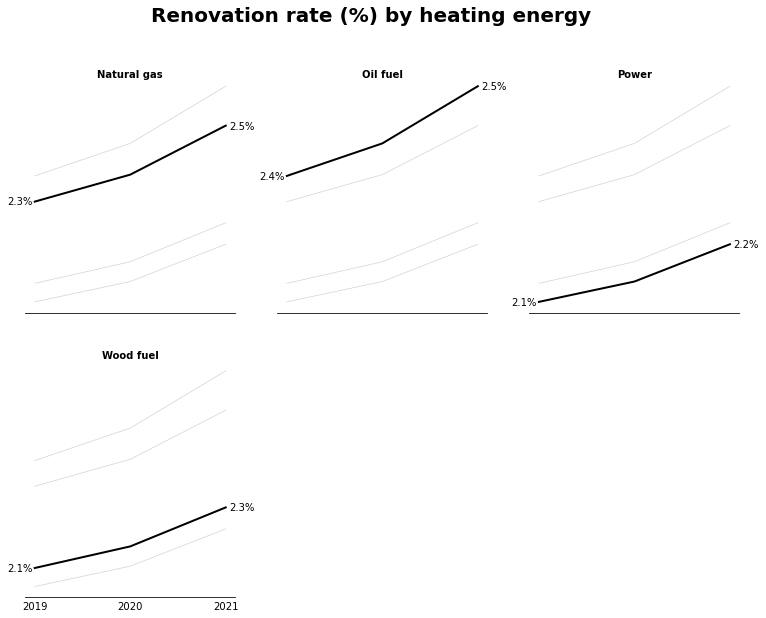

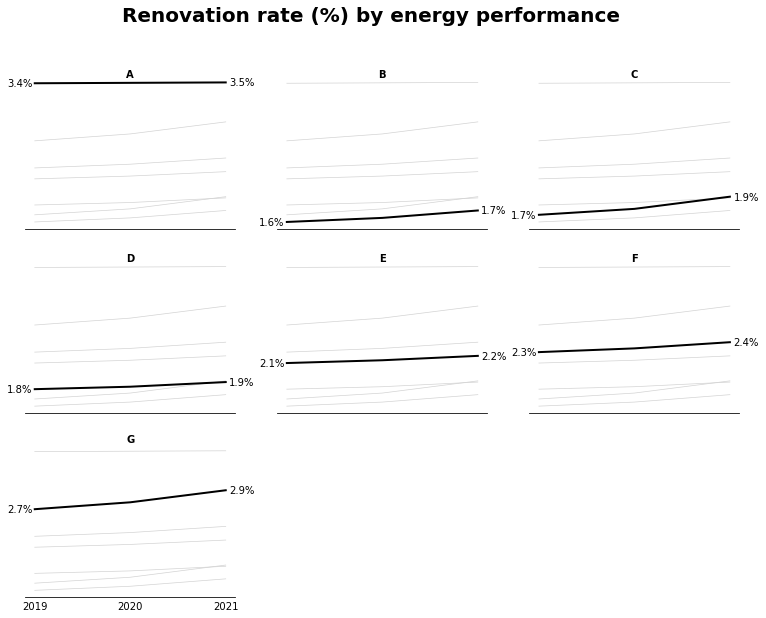

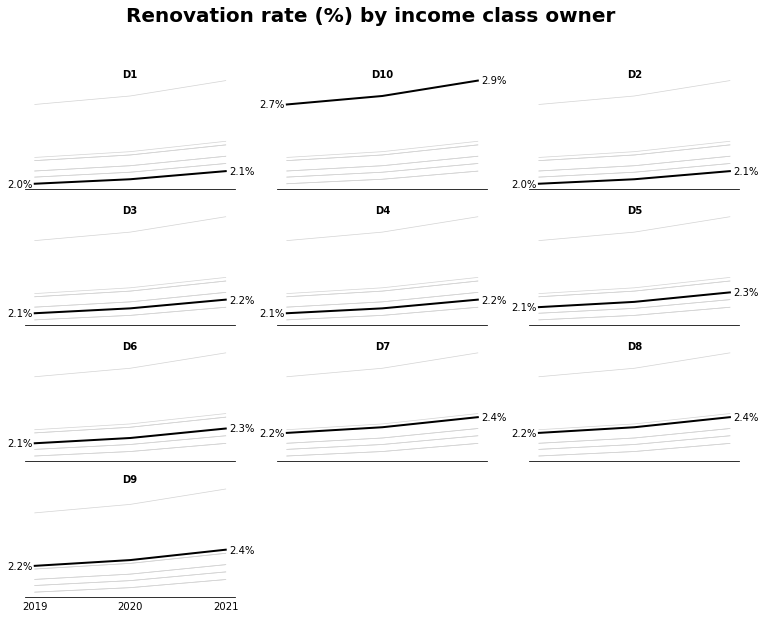

In [17]:
for level in output_stock['Renovation rate (%) - Renovation'].index.names:
    grouped_and_graph(output_stock['Renovation rate (%) - Renovation'], level, 'Renovation rate (%)', format_val=lambda x: '{:.1%}'.format(x), func='mean')

# Use intensity

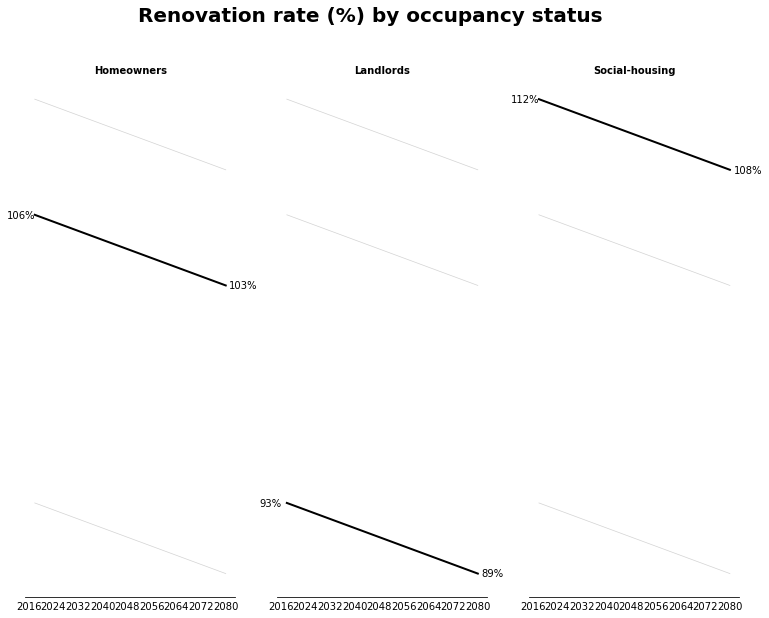

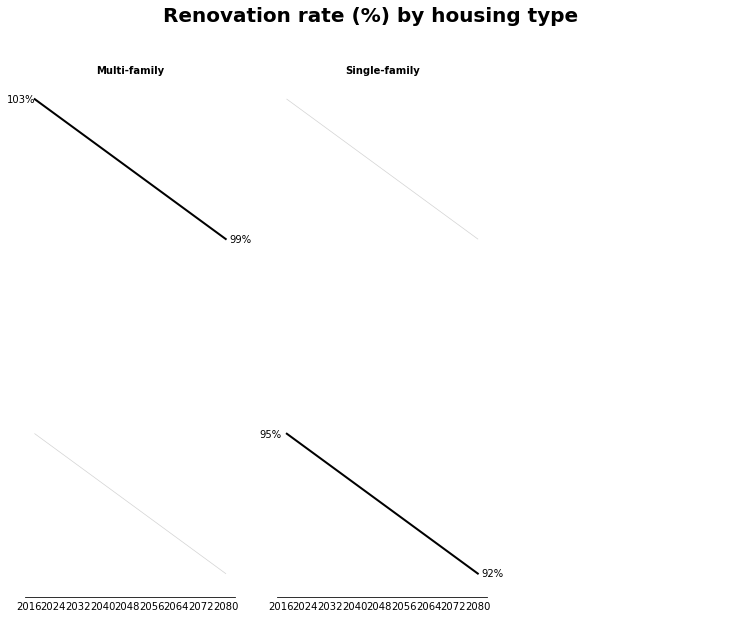

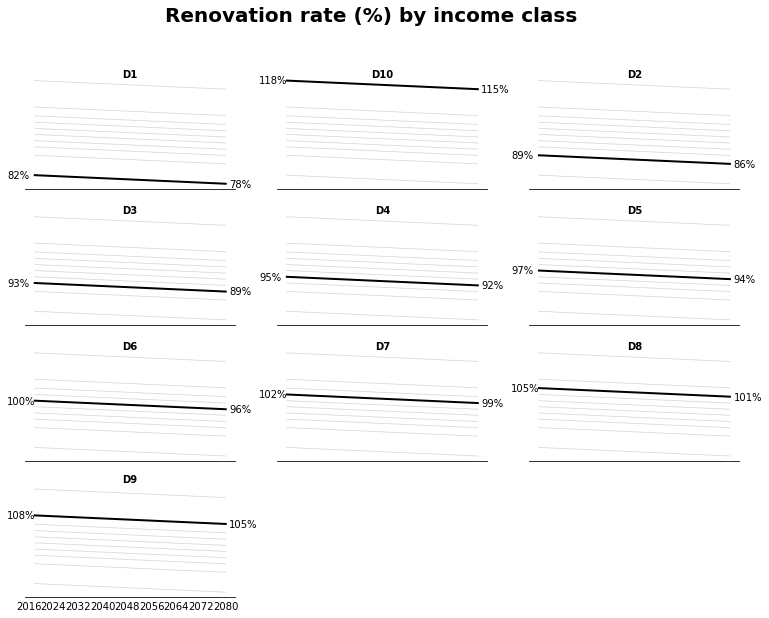

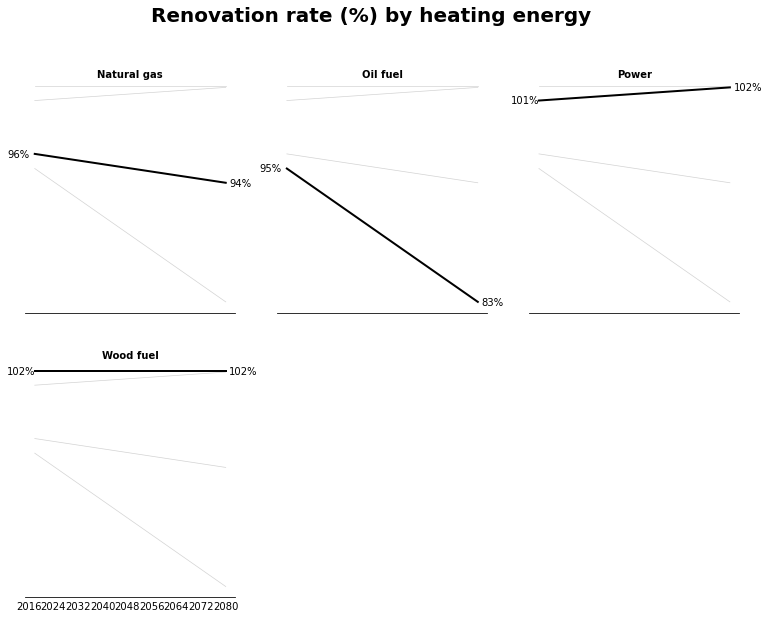

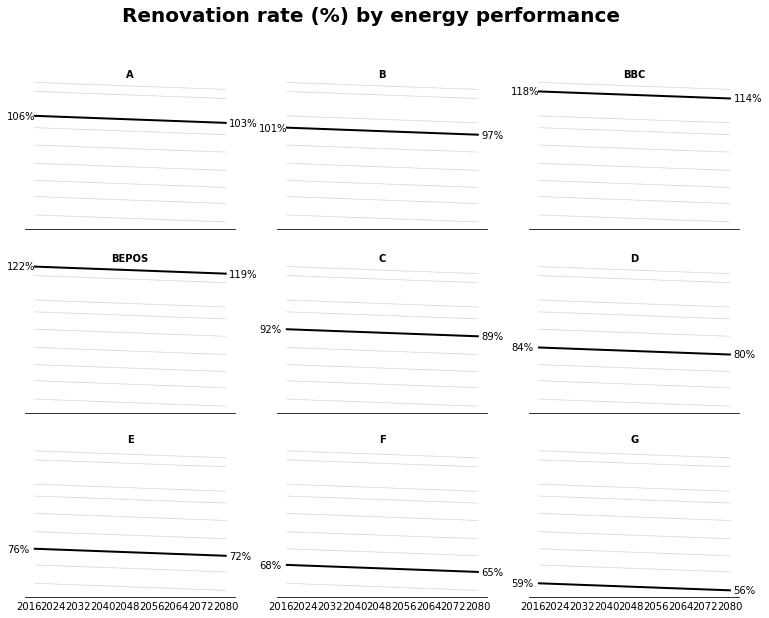

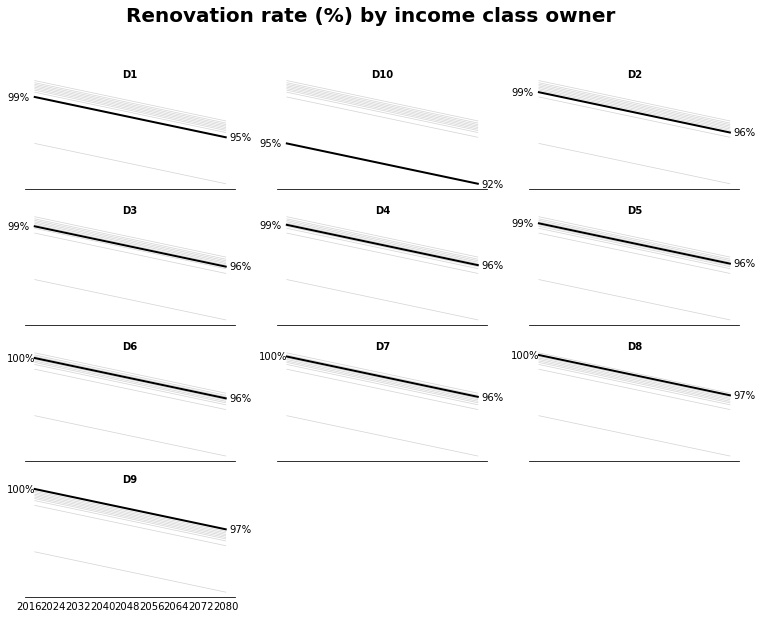

In [18]:
for level in output_stock['Use intensity (%)'].index.names:
    grouped_and_graph(output_stock['Use intensity (%)'], level, 'Renovation rate (%)', format_val=lambda x: '{:.0%}'.format(x), func='mean')

# Transition

In [19]:
output_transition.keys()

dict_keys(['Flow transition', 'Flow transition (m2)', 'Capex (€/m2)', 'Capex (€)', 'Subsidies (€/m2)', 'Subsidies (€)'])

## Flow

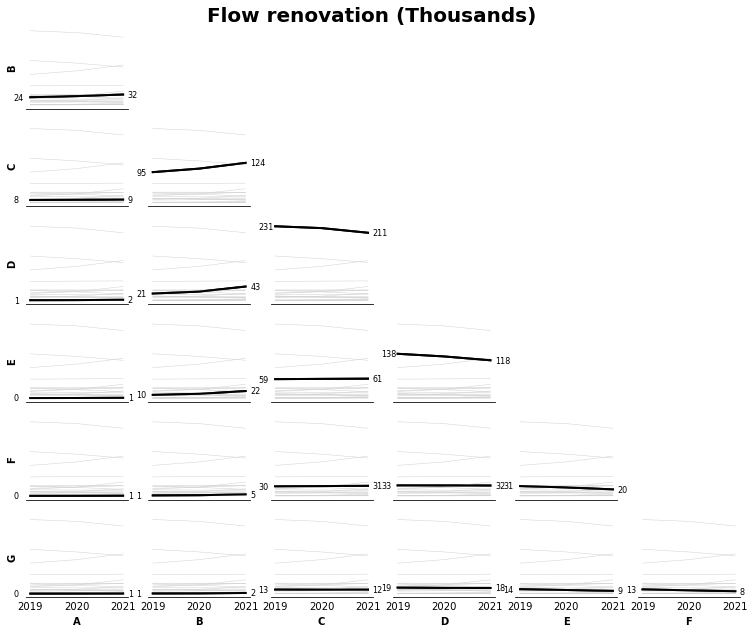

In [20]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_transition['Flow transition'].groupby([level_x, level_y]).sum(), suptitle='Flow renovation (Thousands)', format_val=lambda x: '{:,.0f}'.format(x / 1000))
table_plots(output_transition['Flow transition'].groupby([level_x, level_y]).sum(), level_x, level_y, suptitle='Flow renovation (Thousands)', format_val=lambda x: '{:,.0f}'.format(x / 1000))

## Capex 

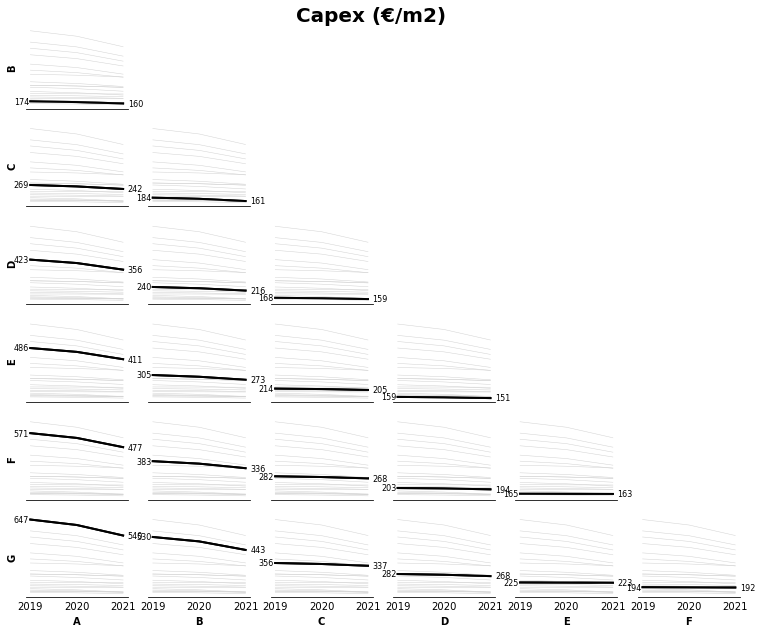

In [21]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_transition['Capex (€/m2)'].groupby([level_x, level_y]).mean(), level_x, level_y, suptitle='Capex (€/m2)', format_val=lambda x: '{:.0f}'.format(x))

## Subsidies

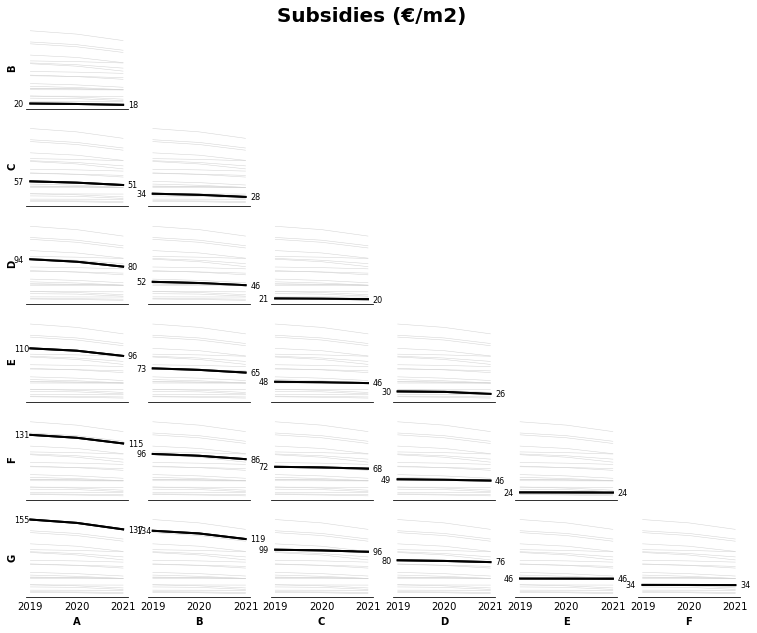

In [25]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_transition['Subsidies (€/m2)'].groupby([level_x, level_y]).mean(), level_x, level_y, suptitle='Subsidies (€/m2)', format_val=lambda x: '{:.0f}'.format(x))

### Details

In [23]:
output_subsidies_year.keys()

dict_keys(['Cite (€/m2)', 'Cee subsidy (€/m2)', 'Eptz (€/m2)', 'Cite (€)', 'Cee subsidy (€)', 'Eptz (€)'])

In [24]:
level_x = 'Energy performance'
level_y = 'Energy performance final'
table_plots(output_subsidies_year['cite (€/m2)'].groupby([level_x, level_y]).mean(), level_x, level_y, suptitle='', format_val=lambda x: '{:.0f}'.format(x))

KeyError: 'cite (€/m2)'